In [120]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [121]:
h_data=pd.read_csv("C:\\Users\\sudee\\Downloads\\data.csv")
h_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [122]:
h_data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

# CITY

In [123]:
h_data['city'].unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

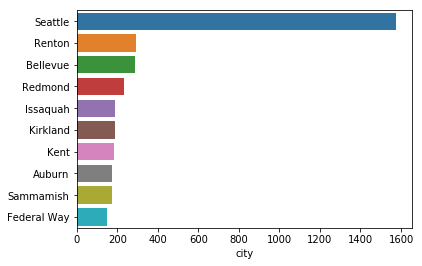

In [124]:
top_10_cities = h_data['city'].value_counts().head(10)
sns.barplot(x = top_10_cities, y=top_10_cities.index)

In [125]:
h_data['price'].mean()

551962.9884732141

Average price of house is around 550000

# EDA

# Bedrooms

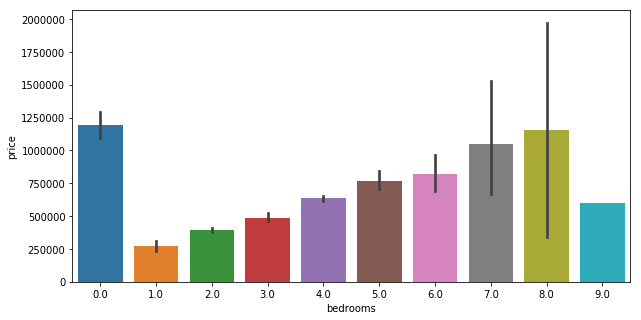

In [126]:
# greater the number of bedrooms higher the price
plt.figure(figsize=(10,5))
sns.barplot(x='bedrooms',y='price',data=h_data)
plt.show()

It seems that a house with 9 bedrooms sells for less than a house with 4 bedrooms and Also, some houses don't have any rooms

In [127]:
h_data = h_data[(h_data['bedrooms'] > 0) & (h_data['bedrooms'] < 8)]
h_data['bedrooms'] = h_data['bedrooms'].astype('int')
h_data['bedrooms'].value_counts()

,len,min,max
bedrooms,,,
0.0,2.0,1095000.0,1295648.0
1.0,38.0,0.0,540000.0
2.0,566.0,0.0,1695000.0
3.0,2032.0,0.0,26590000.0
4.0,1531.0,0.0,4489000.0
5.0,353.0,0.0,7062500.0
6.0,61.0,0.0,3100000.0
7.0,14.0,280000.0,3200000.0
8.0,2.0,340000.0,1970000.0


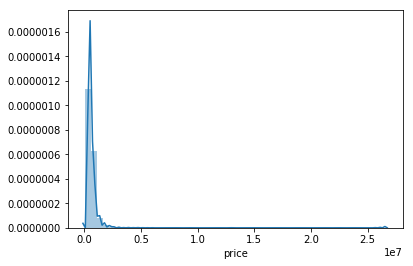

In [131]:
sns.distplot(h_data['price'])

There are some outliers in prices

In [132]:
def remove_outliers(data, x):
    ##lets set the limits
    q25 = np.percentile(data[x], 25)
    q75 = np.percentile(data[x], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = 1, (q75 + cut_off)
    data = data[(data[x] < upper) & (data[x] > lower)]
    print(f"Outliers of {x} are removed\n")
    return data

In [133]:
h_data = remove_outliers(h_data, 'price')

Outliers of price are removed



In [148]:
h_data['bedrooms'] = h_data['bedrooms'].astype('int')
h_data['bathrooms'] = h_data['bathrooms'].astype('int')
h_data['floors']=h_data['floors'].astype('int')

# Yr Renovated

(array([2582.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1769.]),
 array([   0. ,  201.4,  402.8,  604.2,  805.6, 1007. , 1208.4, 1409.8,
        1611.2, 1812.6, 2014. ]),
 <a list of 10 Patch objects>)

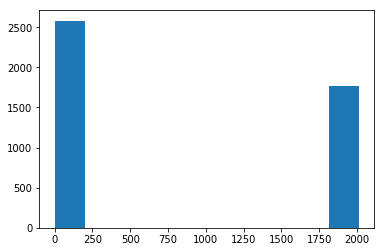

In [135]:
plt.hist(x='yr_renovated', data=h_data)

Lets make this as renovated or not. Either 0 or 1.

In [136]:
h_data['yr_renovated'] = h_data['yr_renovated'].apply(lambda x: x if x == 0 else 1)

In [137]:
h_data.drop(['date','country', 'statezip', 'street'], axis=1, inplace=True)

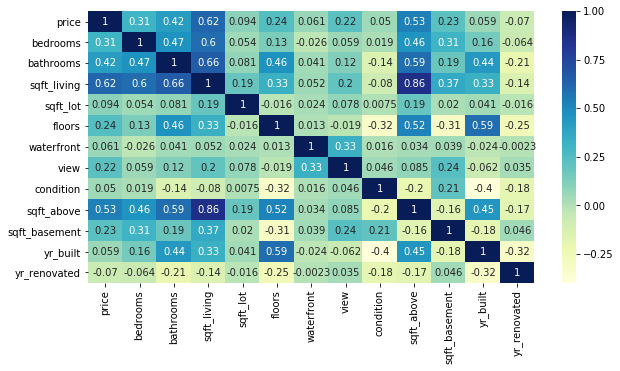

In [138]:
plt.figure(figsize=(10,5))
corr_mt=h_data.corr()
sns.heatmap(corr_mt,annot=True,cmap="YlGnBu")

In [149]:
h_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,313000.0,3,1,1340,7912,1,0,0,3,1340,...,0,0,1,0,0,0,0,0,0,0
2,342000.0,3,2,1930,11947,1,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3,2,2000,8030,1,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4,2,1940,10500,1,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0
5,490000.0,2,1,880,6380,1,0,0,3,880,...,0,1,0,0,0,0,0,0,0,0


# Handling Categorical Variables

In [150]:
h_data = pd.get_dummies(h_data, drop_first=True)
h_data.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,313000.0,3,1,1340,7912,1,0,0,3,1340,...,0,0,1,0,0,0,0,0,0,0
2,342000.0,3,2,1930,11947,1,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3,2,2000,8030,1,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4,2,1940,10500,1,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0
5,490000.0,2,1,880,6380,1,0,0,3,880,...,0,1,0,0,0,0,0,0,0,0


In [156]:
X=h_data.drop('price',axis=1)
y=h_data['price']

In [157]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [158]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [146]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=300, n_jobs=10)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=300, n_jobs=10)

In [147]:
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error : ', mse)
print('r square : ', r2)

Mean squared error :  15088631665.747164
r square :  0.665834941282508
